Nama          : Sayyaf Kholilullah
NIM           : 221011402149
Kelas         : 05TPLE016
Mata Kuliah   : Kecerdasan Buatan (UAS)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="skfuzzy")
from skfuzzy import control as ctrl

# Inisialisasi variabel input
kecepatan = ctrl.Antecedent(np.arange(0, 11, 1), 'Kecepatan')  # Kecepatan Pelayanan
kualitas = ctrl.Antecedent(np.arange(0, 11, 1), 'Kualitas')  # Kualitas Makanan
suasana = ctrl.Antecedent(np.arange(0, 11, 1), 'Suasana')  # Suasana Restoran

# Inisialisasi variabel output
kebahagiaan = ctrl.Consequent(np.arange(0, 11, 1), 'Kebahagiaan')  # Tingkat Kebahagiaan

In [2]:
# Kecepatan Pelayanan
kecepatan['Cepat'] = fuzz.trapmf(kecepatan.universe, [0, 0, 2, 4])
kecepatan['Lambat'] = fuzz.trapmf(kecepatan.universe, [2, 4, 6, 8])
kecepatan['Sangat_Lambat'] = fuzz.trapmf(kecepatan.universe, [6, 8, 10, 10])

# Kualitas Makanan
kualitas['Buruk'] = fuzz.trapmf(kualitas.universe, [0, 0, 2, 4])
kualitas['Lumayan'] = fuzz.trapmf(kualitas.universe, [2, 4, 6, 8])
kualitas['Sangat_Baik'] = fuzz.trapmf(kualitas.universe, [6, 8, 10, 10])

# Suasana Restoran
suasana['Buruk'] = fuzz.trapmf(suasana.universe, [0, 0, 2, 4])
suasana['Biasa_Saja'] = fuzz.trapmf(suasana.universe, [2, 4, 6, 8])
suasana['Nyaman'] = fuzz.trapmf(suasana.universe, [6, 8, 10, 10])

# Tingkat Kebahagiaan
kebahagiaan['Tidak_Bahagia'] = fuzz.trapmf(kebahagiaan.universe, [0, 0, 2, 4])
kebahagiaan['Biasa_Saja'] = fuzz.trapmf(kebahagiaan.universe, [2, 4, 6, 8])
kebahagiaan['Bahagia'] = fuzz.trapmf(kebahagiaan.universe, [6, 8, 10, 10])

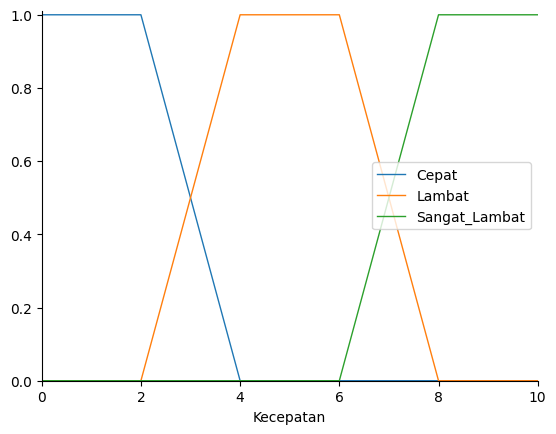

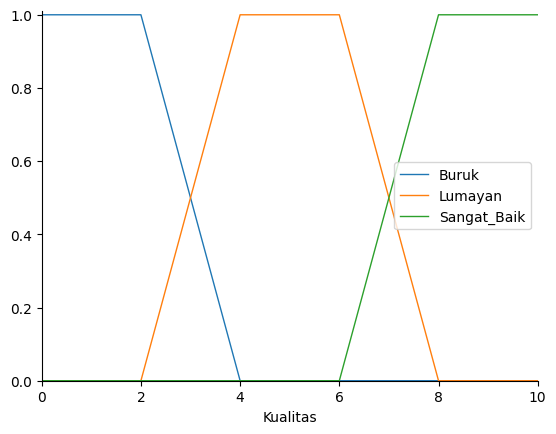

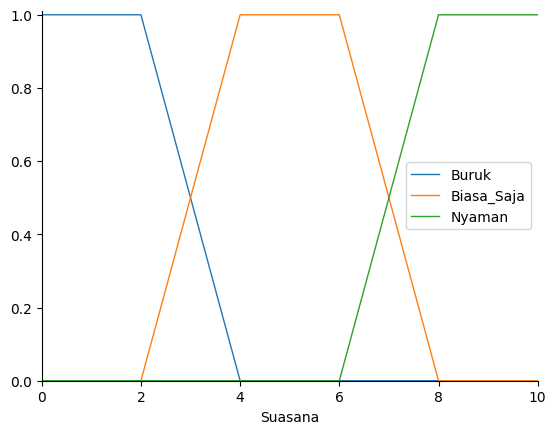

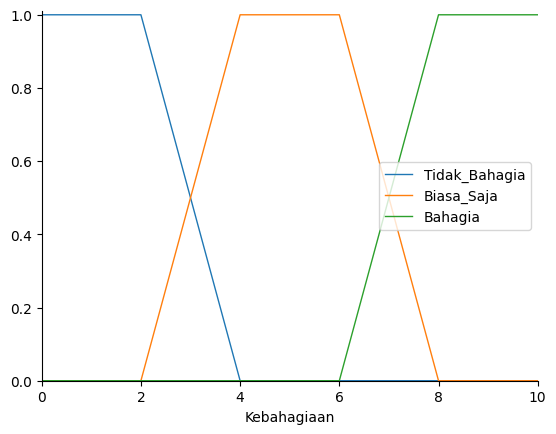

In [3]:
kecepatan.view()
plt.ylabel('') 
plt.legend(loc='center right')  
plt.show()

kualitas.view()
plt.ylabel('') 
plt.legend(loc='center right')  
plt.show()

suasana.view()
plt.ylabel('') 
plt.legend(loc='center right')  
plt.show()

kebahagiaan.view()
plt.ylabel('') 
plt.legend(loc='center right')  
plt.show()

In [4]:
# Definisi aturan fuzzy lengkap
aturan_fuzzy = [
    # Kecepatan: Cepat
    ctrl.Rule(kecepatan['Cepat'] & kualitas['Sangat_Baik'] & suasana['Nyaman'], kebahagiaan['Bahagia']),
    ctrl.Rule(kecepatan['Cepat'] & kualitas['Sangat_Baik'] & suasana['Biasa_Saja'], kebahagiaan['Bahagia']),
    ctrl.Rule(kecepatan['Cepat'] & kualitas['Sangat_Baik'] & suasana['Buruk'], kebahagiaan['Biasa_Saja']),
    ctrl.Rule(kecepatan['Cepat'] & kualitas['Lumayan'] & suasana['Nyaman'], kebahagiaan['Bahagia']),
    ctrl.Rule(kecepatan['Cepat'] & kualitas['Lumayan'] & suasana['Biasa_Saja'], kebahagiaan['Biasa_Saja']),
    ctrl.Rule(kecepatan['Cepat'] & kualitas['Lumayan'] & suasana['Buruk'], kebahagiaan['Biasa_Saja']),
    ctrl.Rule(kecepatan['Cepat'] & kualitas['Buruk'] & suasana['Nyaman'], kebahagiaan['Biasa_Saja']),
    ctrl.Rule(kecepatan['Cepat'] & kualitas['Buruk'] & suasana['Biasa_Saja'], kebahagiaan['Biasa_Saja']),
    ctrl.Rule(kecepatan['Cepat'] & kualitas['Buruk'] & suasana['Buruk'], kebahagiaan['Tidak_Bahagia']),
    
    # Kecepatan: Lambat
    ctrl.Rule(kecepatan['Lambat'] & kualitas['Sangat_Baik'] & suasana['Nyaman'], kebahagiaan['Bahagia']),
    ctrl.Rule(kecepatan['Lambat'] & kualitas['Sangat_Baik'] & suasana['Biasa_Saja'], kebahagiaan['Biasa_Saja']),
    ctrl.Rule(kecepatan['Lambat'] & kualitas['Sangat_Baik'] & suasana['Buruk'], kebahagiaan['Biasa_Saja']),
    ctrl.Rule(kecepatan['Lambat'] & kualitas['Lumayan'] & suasana['Nyaman'], kebahagiaan['Biasa_Saja']),
    ctrl.Rule(kecepatan['Lambat'] & kualitas['Lumayan'] & suasana['Biasa_Saja'], kebahagiaan['Biasa_Saja']),
    ctrl.Rule(kecepatan['Lambat'] & kualitas['Lumayan'] & suasana['Buruk'], kebahagiaan['Tidak_Bahagia']),
    ctrl.Rule(kecepatan['Lambat'] & kualitas['Buruk'] & suasana['Nyaman'], kebahagiaan['Biasa_Saja']),
    ctrl.Rule(kecepatan['Lambat'] & kualitas['Buruk'] & suasana['Biasa_Saja'], kebahagiaan['Tidak_Bahagia']),
    ctrl.Rule(kecepatan['Lambat'] & kualitas['Buruk'] & suasana['Buruk'], kebahagiaan['Tidak_Bahagia']),
    
    # Kecepatan: Sangat Lambat
    ctrl.Rule(kecepatan['Sangat_Lambat'] & kualitas['Sangat_Baik'] & suasana['Nyaman'], kebahagiaan['Biasa_Saja']),
    ctrl.Rule(kecepatan['Sangat_Lambat'] & kualitas['Sangat_Baik'] & suasana['Biasa_Saja'], kebahagiaan['Biasa_Saja']),
    ctrl.Rule(kecepatan['Sangat_Lambat'] & kualitas['Sangat_Baik'] & suasana['Buruk'], kebahagiaan['Tidak_Bahagia']),
    ctrl.Rule(kecepatan['Sangat_Lambat'] & kualitas['Lumayan'] & suasana['Nyaman'], kebahagiaan['Biasa_Saja']),
    ctrl.Rule(kecepatan['Sangat_Lambat'] & kualitas['Lumayan'] & suasana['Biasa_Saja'], kebahagiaan['Tidak_Bahagia']),
    ctrl.Rule(kecepatan['Sangat_Lambat'] & kualitas['Lumayan'] & suasana['Buruk'], kebahagiaan['Tidak_Bahagia']),
    ctrl.Rule(kecepatan['Sangat_Lambat'] & kualitas['Buruk'] & suasana['Nyaman'], kebahagiaan['Tidak_Bahagia']),
    ctrl.Rule(kecepatan['Sangat_Lambat'] & kualitas['Buruk'] & suasana['Biasa_Saja'], kebahagiaan['Tidak_Bahagia']),
    ctrl.Rule(kecepatan['Sangat_Lambat'] & kualitas['Buruk'] & suasana['Buruk'], kebahagiaan['Tidak_Bahagia']),
]

# Sistem kontrol fuzzy
sistem_fuzzy = ctrl.ControlSystem(aturan_fuzzy)
simulasi_fuzzy = ctrl.ControlSystemSimulation(sistem_fuzzy)

In [5]:
# Menentukan kategori berdasarkan himpunan nilai kebahagiaan
def tentukan_kategori(hasil_kebahagiaan):
    if hasil_kebahagiaan <= 4:
        return "Tidak Bahagia"
    elif hasil_kebahagiaan <= 8:
        return "Biasa_Saja"
    else:
        return "Bahagia"

In [6]:
# Masukkan input untuk simulasi
simulasi_fuzzy.input['Kecepatan'] = 2  # Kecepatan Pelayanan
simulasi_fuzzy.input['Kualitas'] = 6  # Kualitas Makanan
simulasi_fuzzy.input['Suasana'] = 5  # Suasana Restoran

# Melakukan perhitungan
simulasi_fuzzy.compute()

# Output hasil simulasi
hasil_kebahagiaan = simulasi_fuzzy.output['Kebahagiaan']

Tingkat Kebahagiaan Pelanggan: 5.00 (Biasa_Saja)


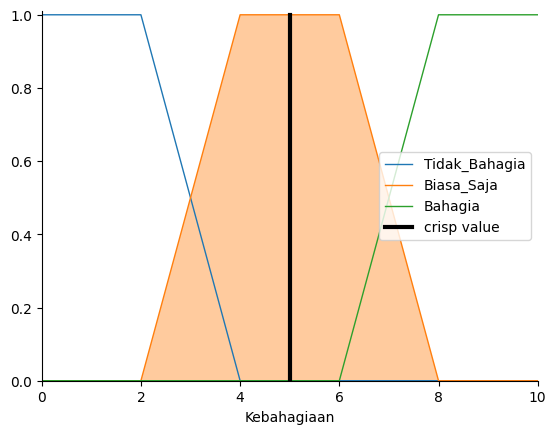

In [7]:
# Menentukan kategori berdasarkan hasil simulasi
kategori = tentukan_kategori(hasil_kebahagiaan)

# Cetak hasil dengan keterangan kategori
print(f"Tingkat Kebahagiaan Pelanggan: {hasil_kebahagiaan:.2f} ({kategori})")
# Visualisasi hasil
kebahagiaan.view(sim=simulasi_fuzzy)

plt.ylabel('')  
plt.legend(loc='center right') 
plt.show()

In [8]:
simulasi_fuzzy.input['Kecepatan'] = 8 
simulasi_fuzzy.input['Kualitas'] = 2  
simulasi_fuzzy.input['Suasana'] = 1  

simulasi_fuzzy.compute()

hasil_kebahagiaan = simulasi_fuzzy.output['Kebahagiaan']

Tingkat Kebahagiaan Pelanggan: 1.56 (Tidak Bahagia)


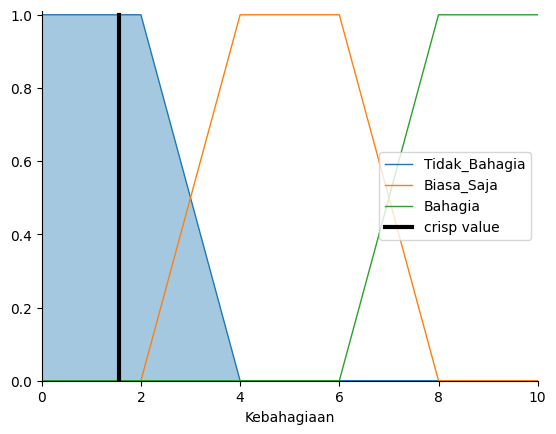

In [9]:
kategori = tentukan_kategori(hasil_kebahagiaan)
print(f"Tingkat Kebahagiaan Pelanggan: {hasil_kebahagiaan:.2f} ({kategori})")

kebahagiaan.view(sim=simulasi_fuzzy)

plt.ylabel('')  
plt.legend(loc='center right') 
plt.show()

In [10]:
simulasi_fuzzy.input['Kecepatan'] = 1  
simulasi_fuzzy.input['Kualitas'] = 5  
simulasi_fuzzy.input['Suasana'] = 7  

simulasi_fuzzy.compute()

hasil_kebahagiaan = simulasi_fuzzy.output['Kebahagiaan']

Tingkat Kebahagiaan Pelanggan: 6.24 (Biasa_Saja)


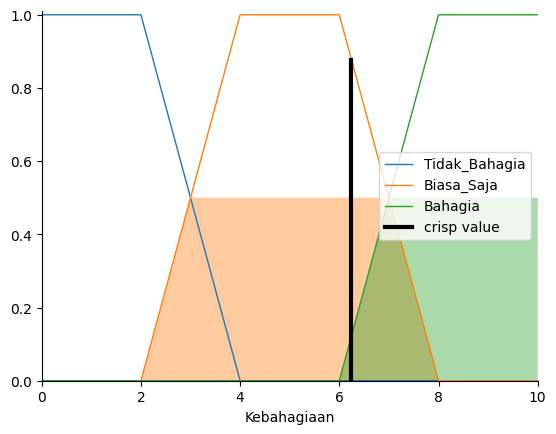

In [11]:
kategori = tentukan_kategori(hasil_kebahagiaan)
print(f"Tingkat Kebahagiaan Pelanggan: {hasil_kebahagiaan:.2f} ({kategori})")

kebahagiaan.view(sim=simulasi_fuzzy)

plt.ylabel('')  
plt.legend(loc='center right') 
plt.show()

In [12]:
simulasi_fuzzy.input['Kecepatan'] = 1
simulasi_fuzzy.input['Kualitas'] = 9  
simulasi_fuzzy.input['Suasana'] = 10  

simulasi_fuzzy.compute()

hasil_kebahagiaan = simulasi_fuzzy.output['Kebahagiaan']

Tingkat Kebahagiaan Pelanggan: 8.44 (Bahagia)


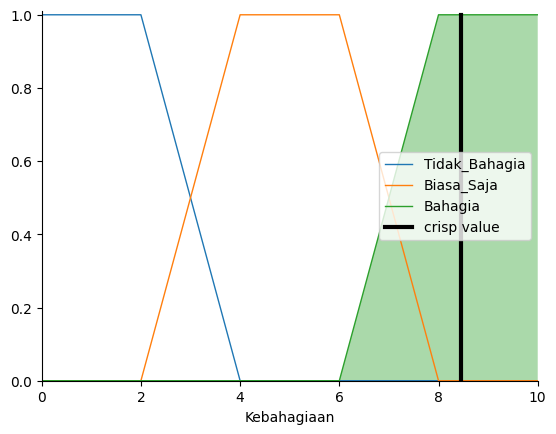

In [13]:
kategori = tentukan_kategori(hasil_kebahagiaan)
print(f"Tingkat Kebahagiaan Pelanggan: {hasil_kebahagiaan:.2f} ({kategori})")

kebahagiaan.view(sim=simulasi_fuzzy)

plt.ylabel('')  
plt.legend(loc='center right') 
plt.show()